# Baseline against best HPT models

In [2]:
%load_ext autoreload
%autoreload 2
from stock_prediction.etl.ticker_data_extractors import train_test_split
from stock_prediction.utils.series import get_normalized_nsteps_ahead_predictions_array
from stock_prediction.modeling.baselines import (
    RollingGeometricAverage,
    NoReturnForecast,
)
from stock_prediction.modeling.arima import UnivariateARIMAs
from stock_prediction.modeling.lightgbm_model import UnivariateLightGBMs
from stock_prediction.evaluation.analysis import summary_analysis
import pandas as pd

In [7]:
df_train, df_test = train_test_split()
df_all = pd.concat([df_train, df_test])

2025-01-06 20:39:53,978 - stock_logger - INFO - Dataset loaded with 3318 samples and 100 features.


In [9]:
w_size = 20
i_predict_min = df_train.shape[0]
i_predict_max = df_all.shape[0] - w_size - 1

In [10]:
df_all_cumulative = (1 + df_all).cumprod()
actuals = get_normalized_nsteps_ahead_predictions_array(
    df=df_all_cumulative,
    n_steps_ahead=w_size,
    index_start=i_predict_min,
    index_end=i_predict_max,
)

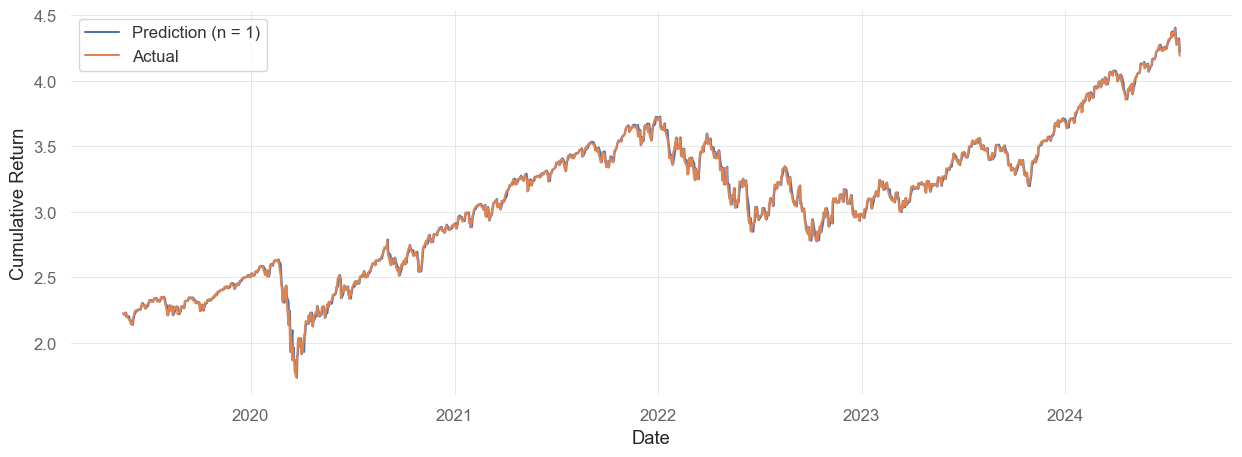

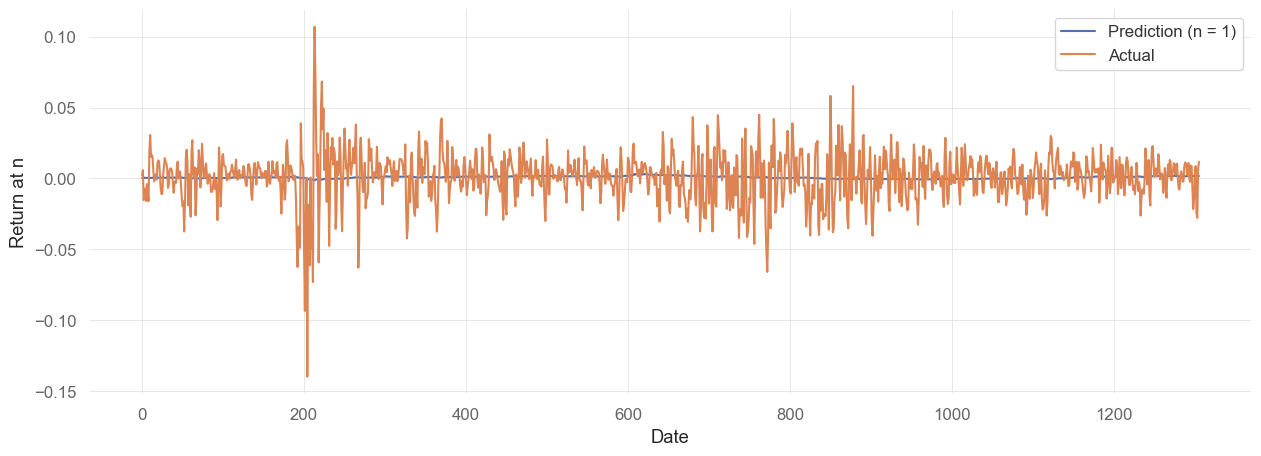

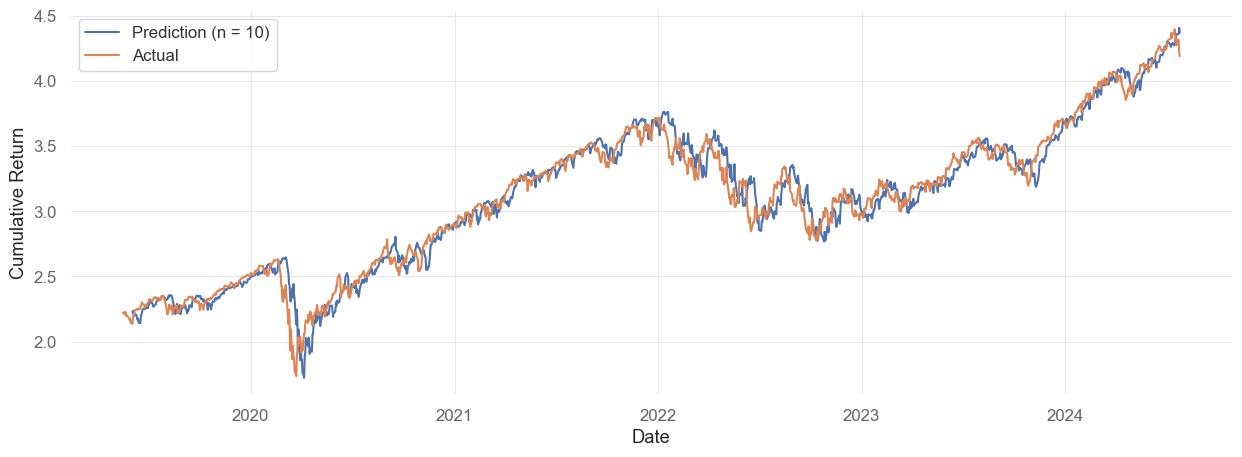

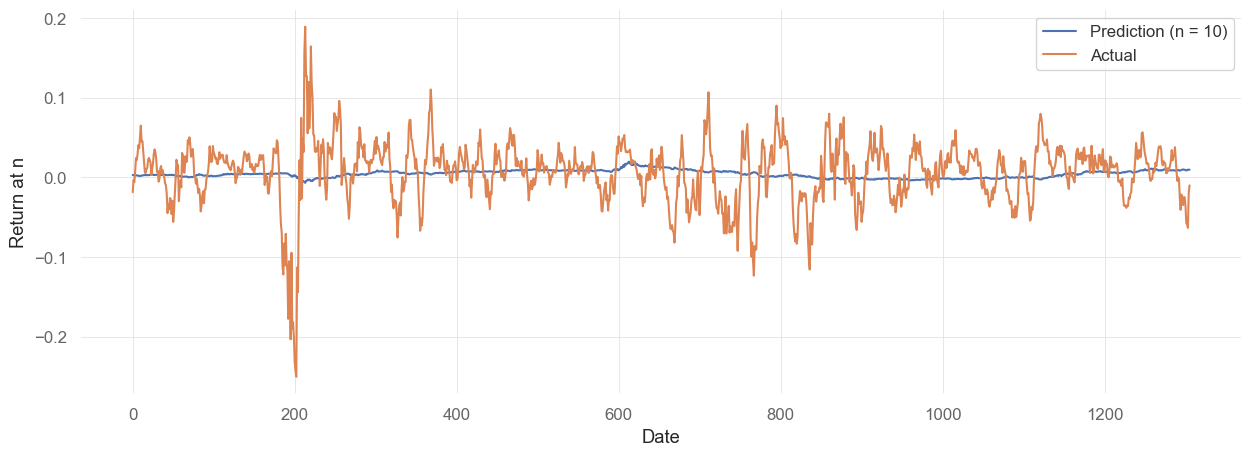

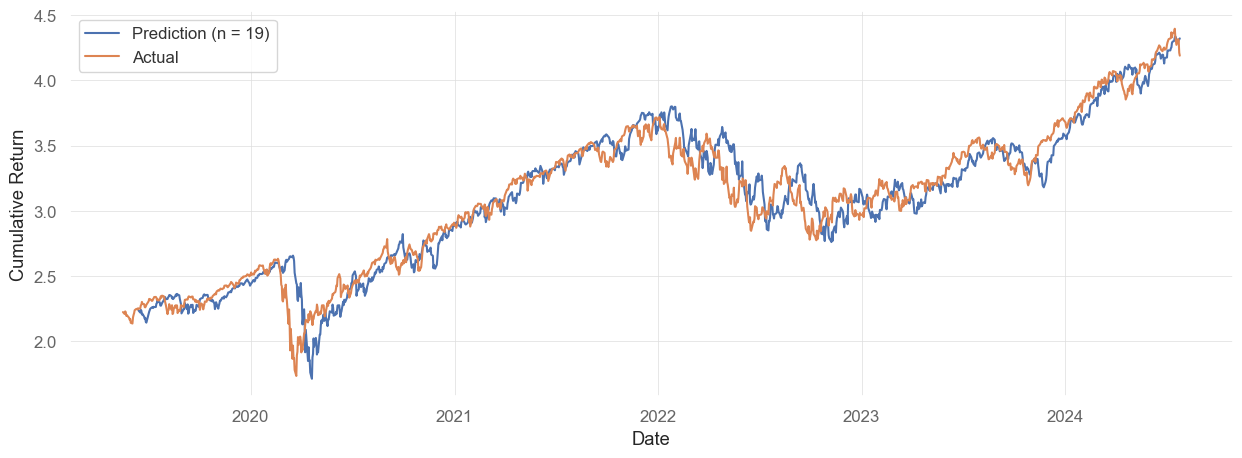

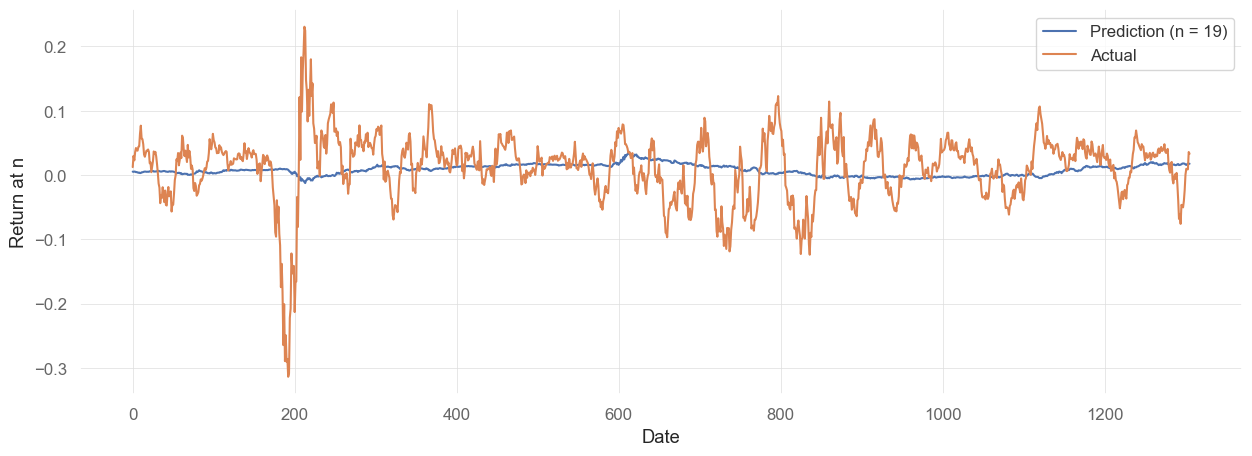

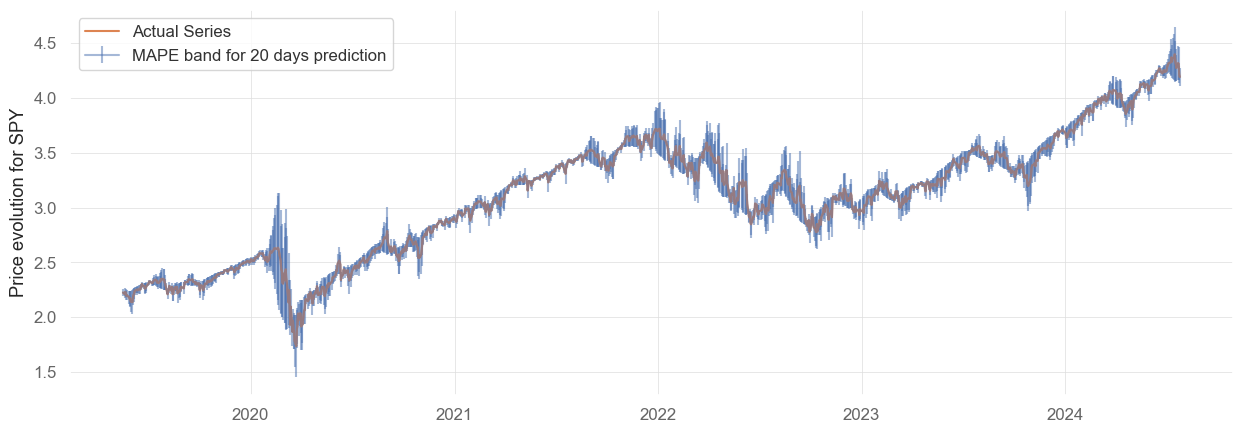

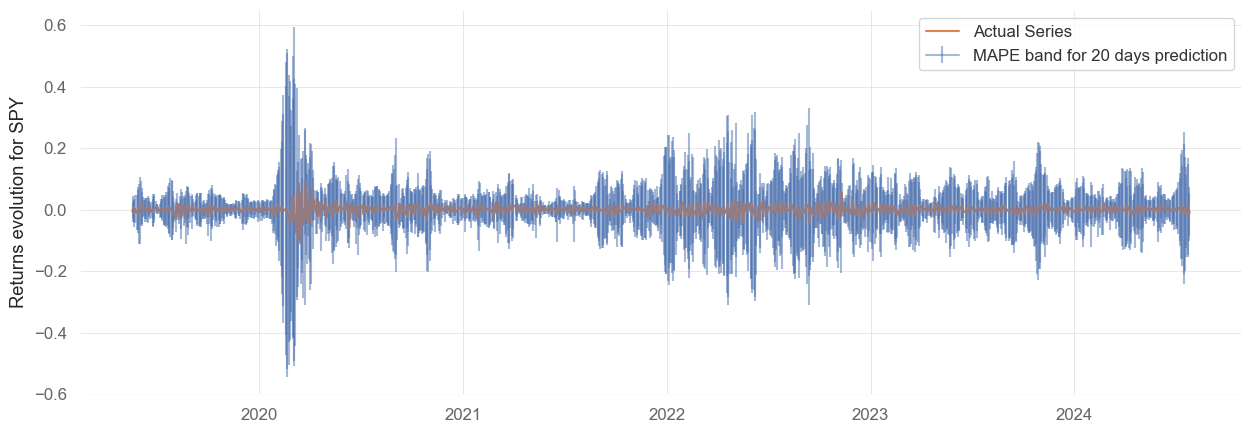

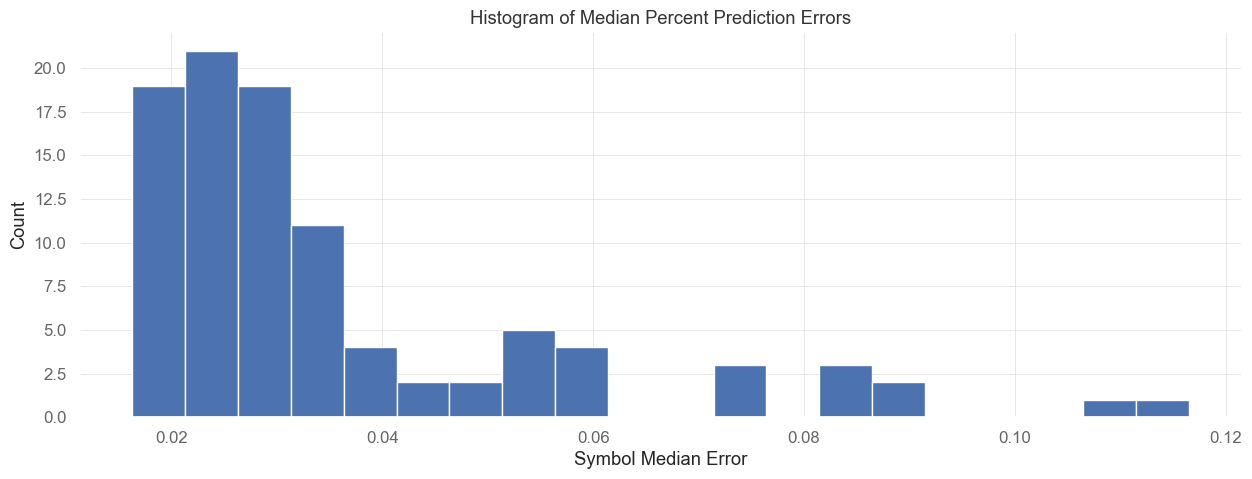

count    97.000000
mean      0.036448
std       0.021135
min       0.016297
25%       0.021811
50%       0.027550
75%       0.040470
max       0.116538
Name: 50%, dtype: float64
Median of Median Errors    0.027550
Mean of Median Errors      0.036448
Mean of Mean Errors        0.048022
dtype: float64


In [11]:
# Rolling Geometric Average
rolling_geom_avg_model = RollingGeometricAverage(window=20 * w_size)
predictions = rolling_geom_avg_model.predict(
    df_all,
    n_steps_predict=w_size,
    index_start=i_predict_min,
    index_end=i_predict_max,
)
ser_results = summary_analysis(
    df=df_all,
    n_predict=w_size,
    predictions=predictions,
    actuals=actuals,
    index_start=i_predict_min,
    index_end=i_predict_max,
    symbol="SPY",
)

Training BIB...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9022
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 44
[LightGBM] [Info] Start training from score 0.001187
Training CSM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9047
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 44
[LightGBM] [Info] Start training from score 0.000479
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

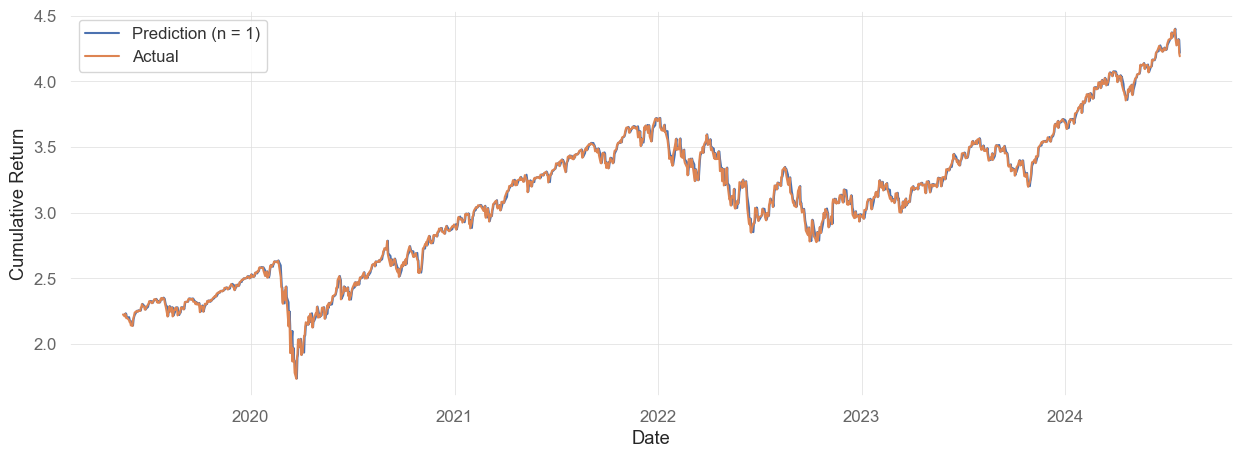

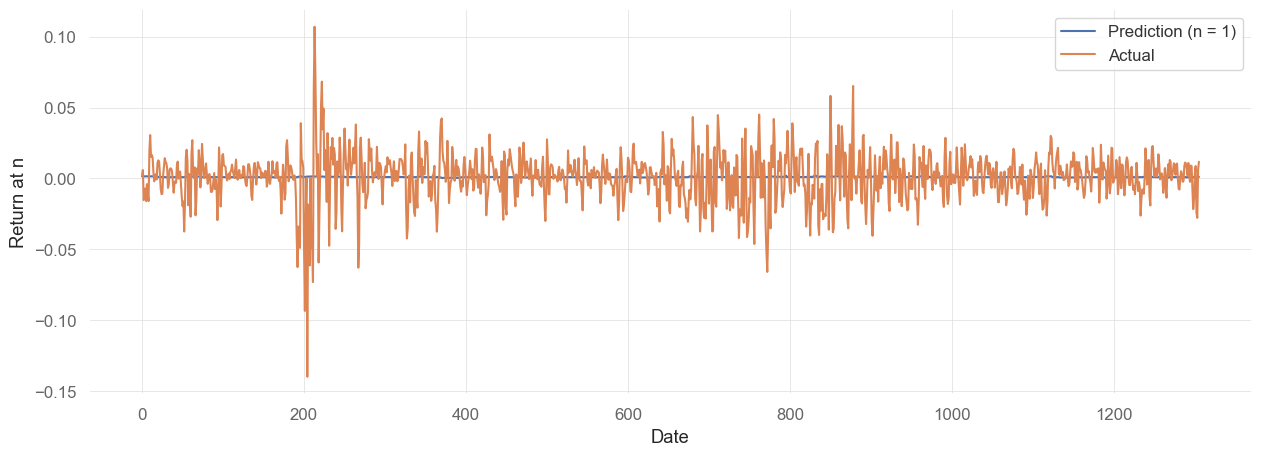

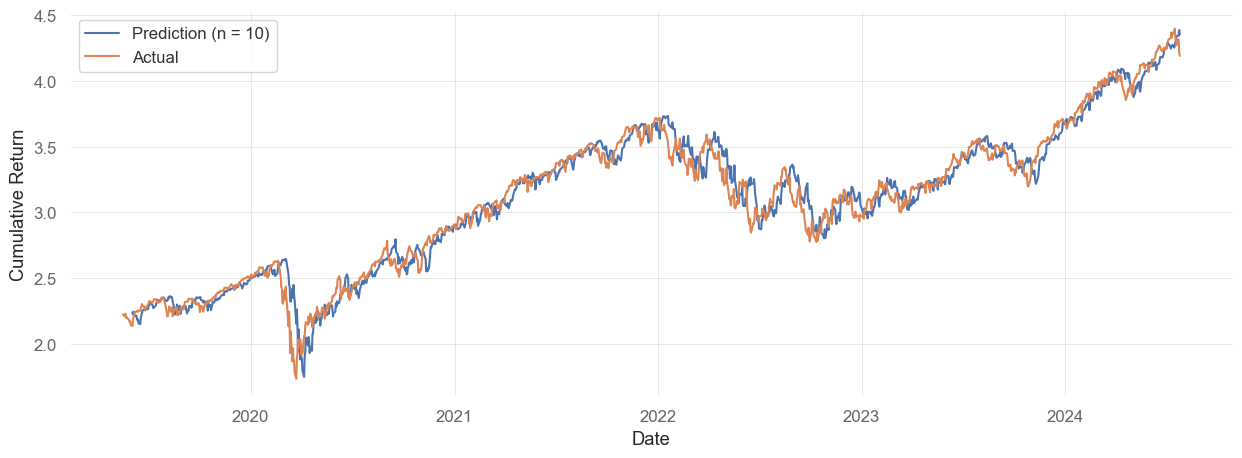

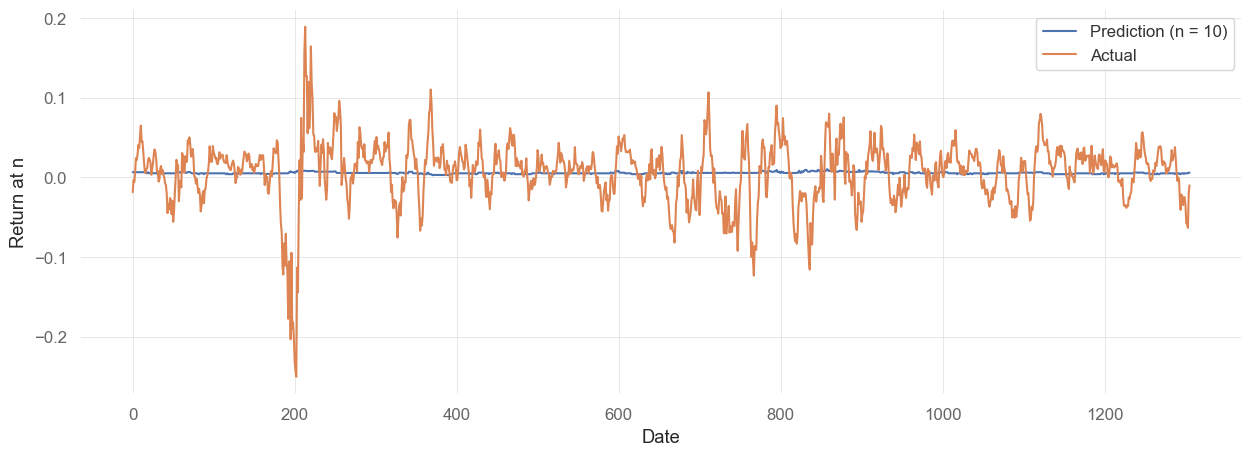

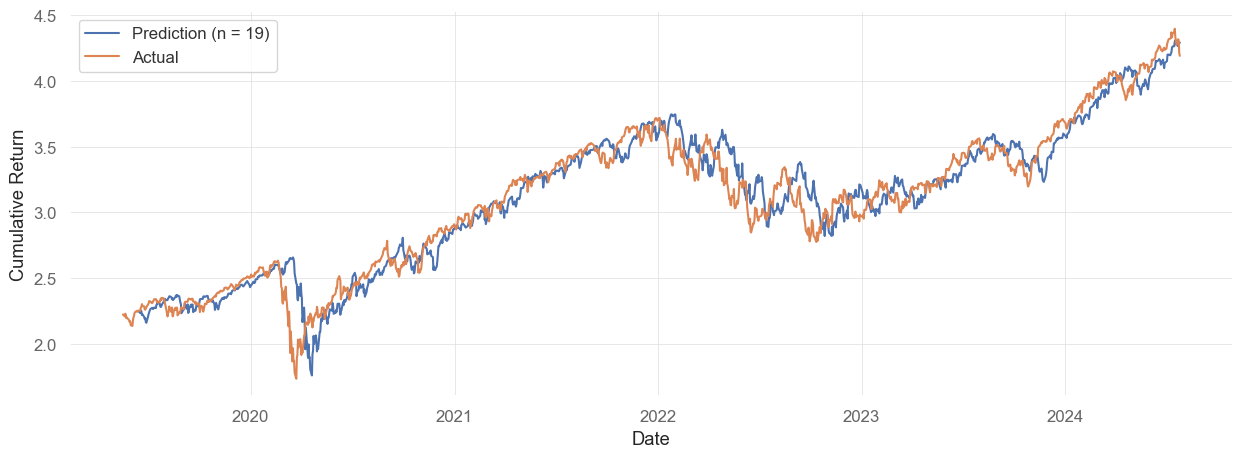

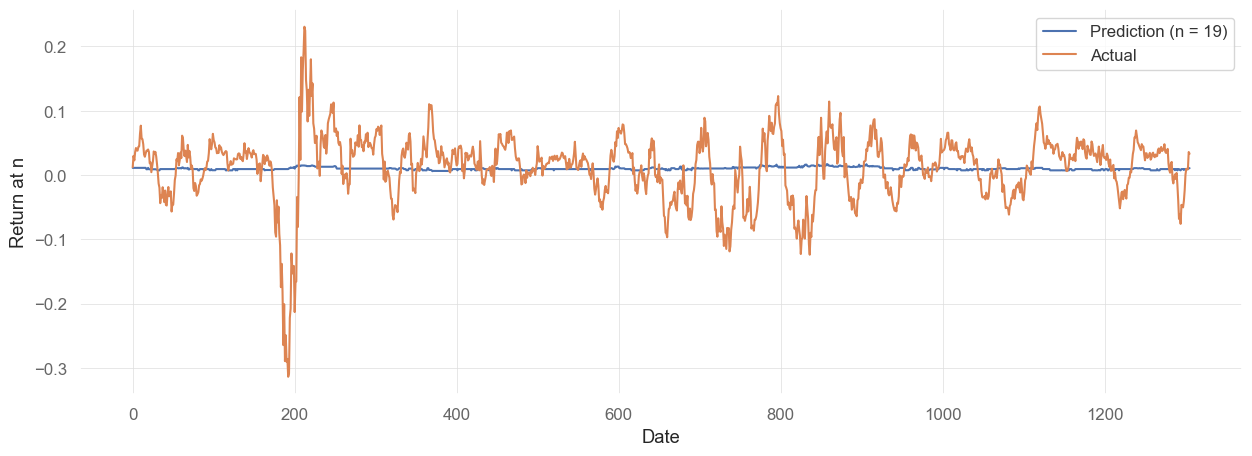

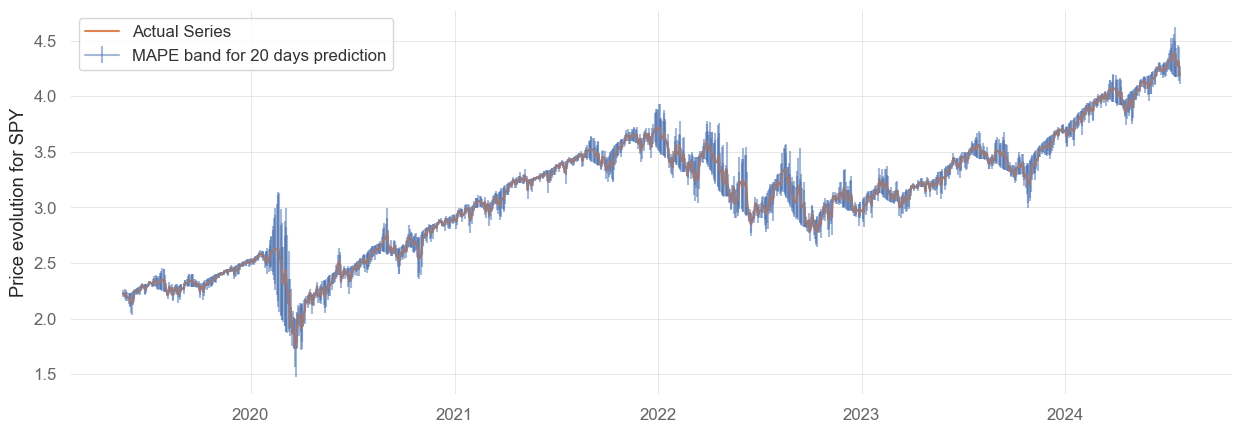

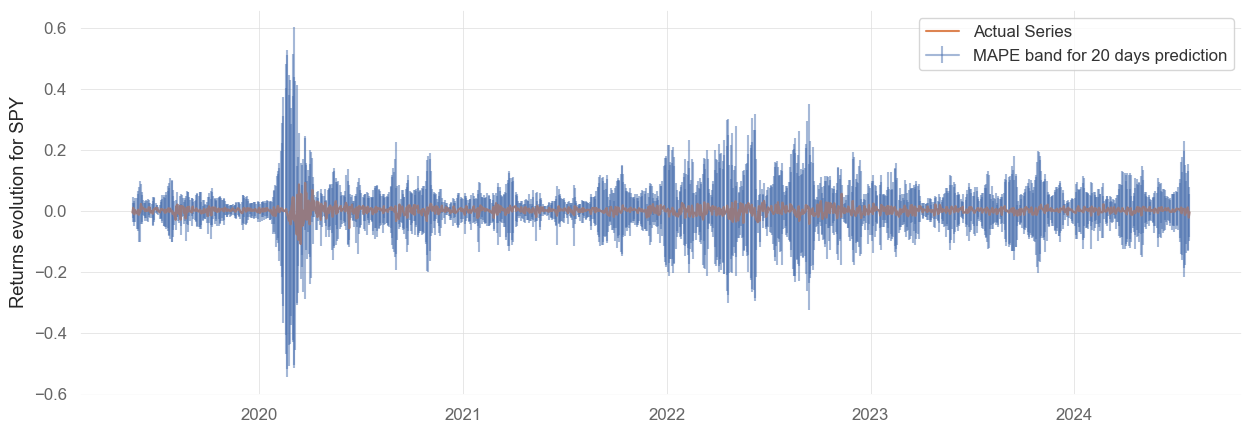

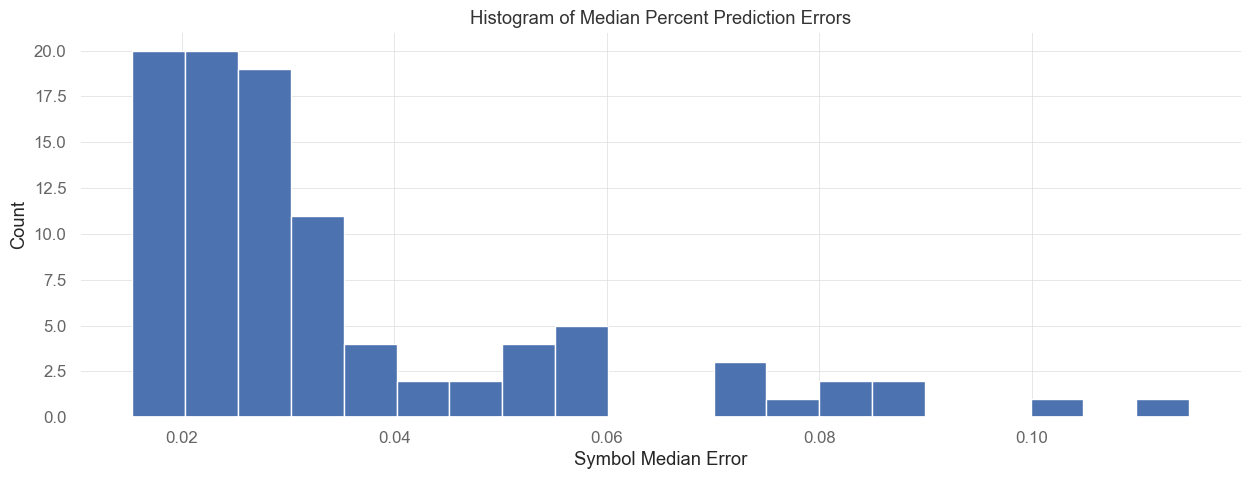

count    97.000000
mean      0.035206
std       0.020424
min       0.015349
25%       0.021487
50%       0.027053
75%       0.038905
max       0.114790
Name: 50%, dtype: float64
Median of Median Errors    0.027053
Mean of Median Errors      0.035206
Mean of Mean Errors        0.047003
dtype: float64


In [16]:
# LightGBM best tradeoff
lgbm_model = UnivariateLightGBMs(
    windows=[5, 20, 60, 180, 400],
    lgbm_hpts={"max_depth": 5, "learning_rate": 0.001},
)
lgbm_model.fit(df_train)
predictions_lgbm = lgbm_model.predict(
    df_all,
    n_steps_predict=w_size,
    index_start=i_predict_min,
    index_end=i_predict_max + 1,
)
ser_results = summary_analysis(
    df=df_all,
    n_predict=w_size,
    predictions=predictions_lgbm[:-1, :, :],
    actuals=actuals,
    index_start=i_predict_min,
    index_end=i_predict_max,
    symbol="SPY",
)

Training BIB...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9022
[LightGBM] [Info] Number of data points in the train set: 31400, number of used features: 44
[LightGBM] [Info] Start training from score 0.001187
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

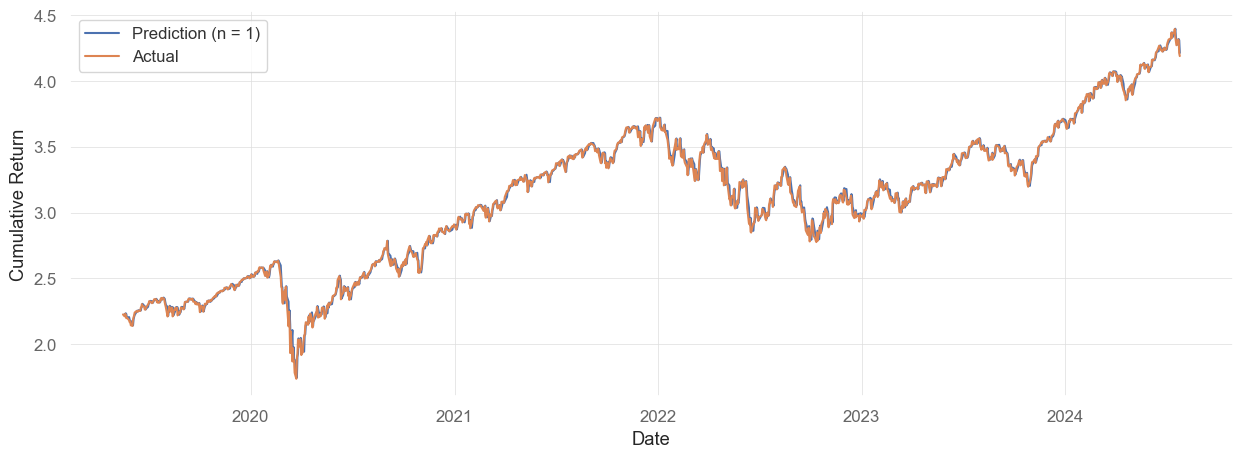

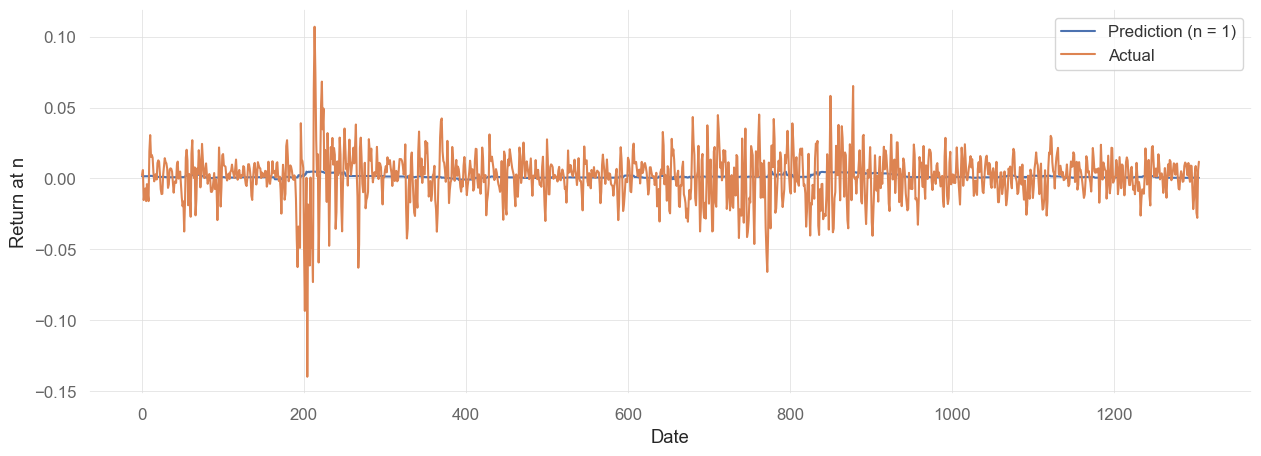

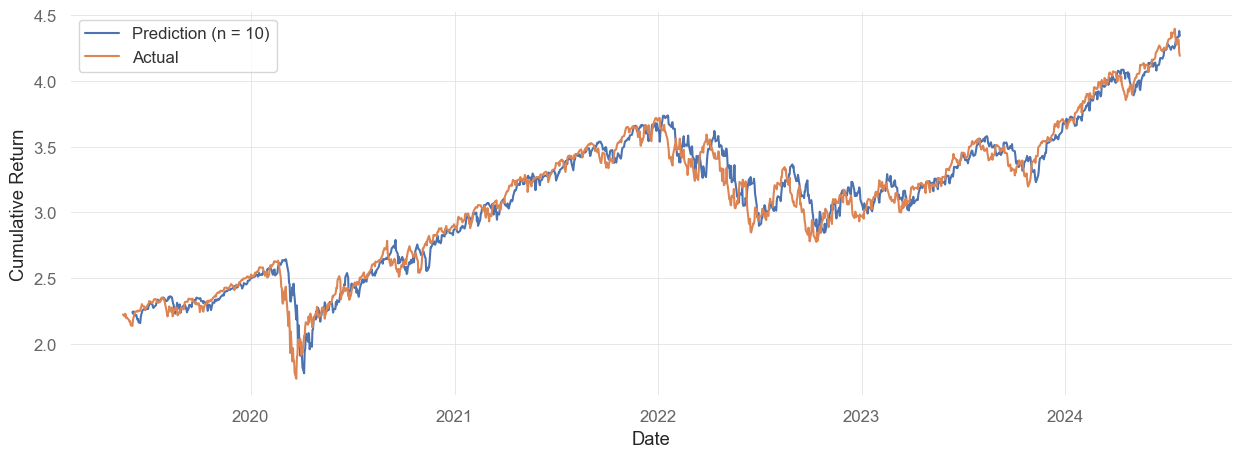

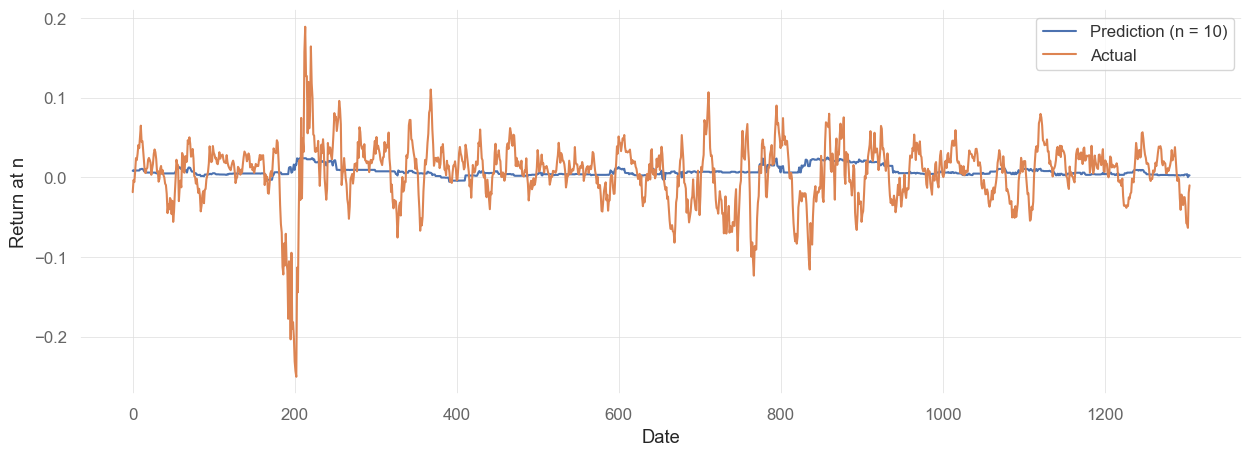

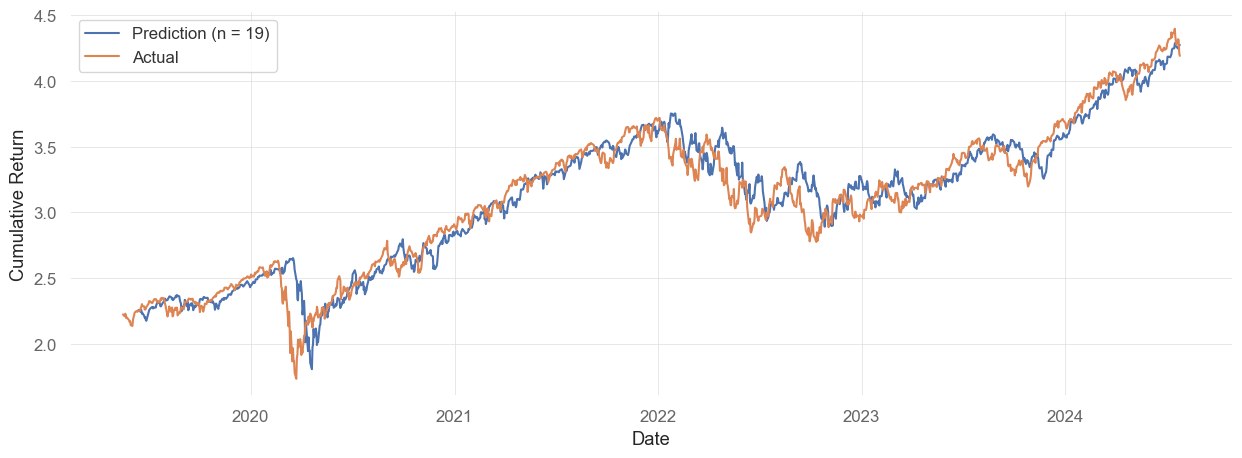

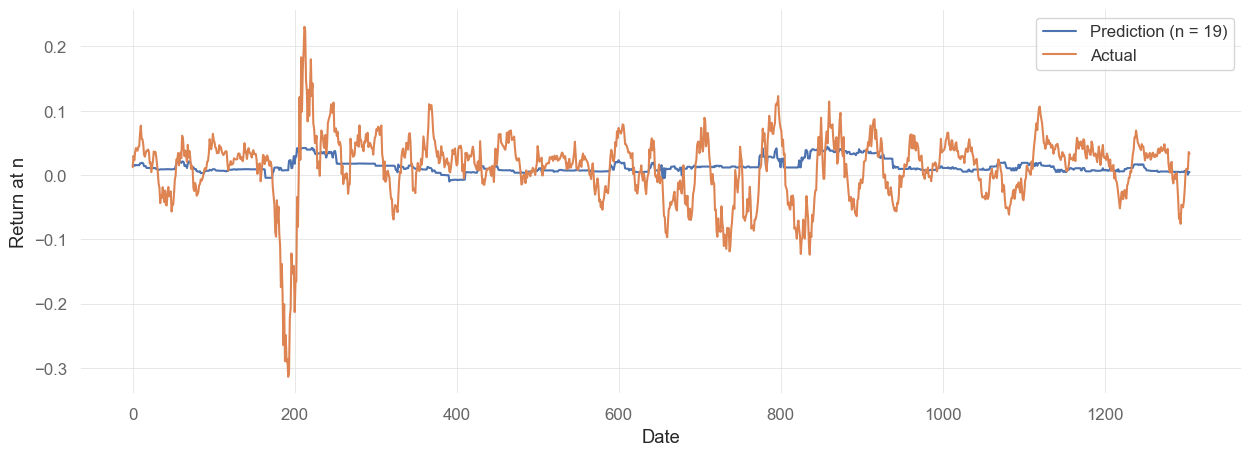

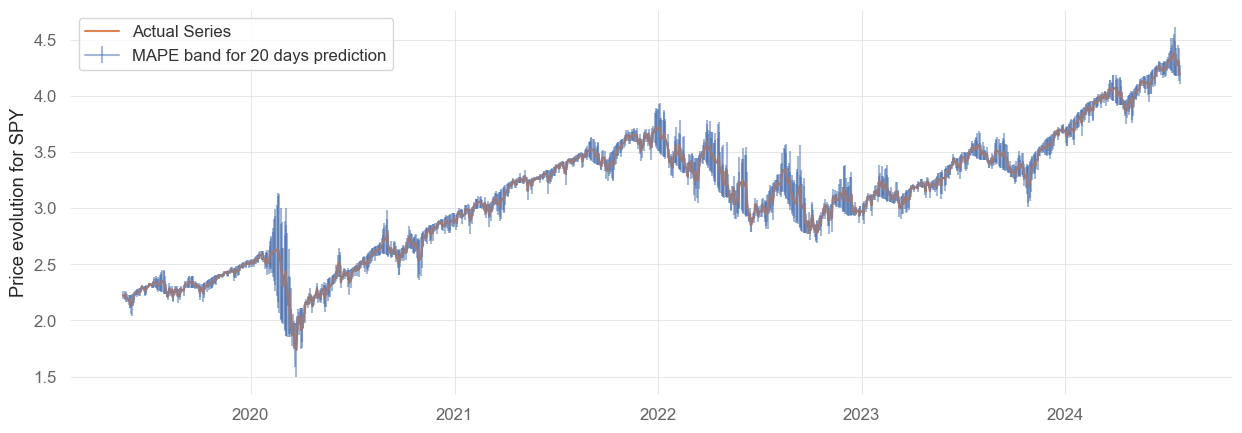

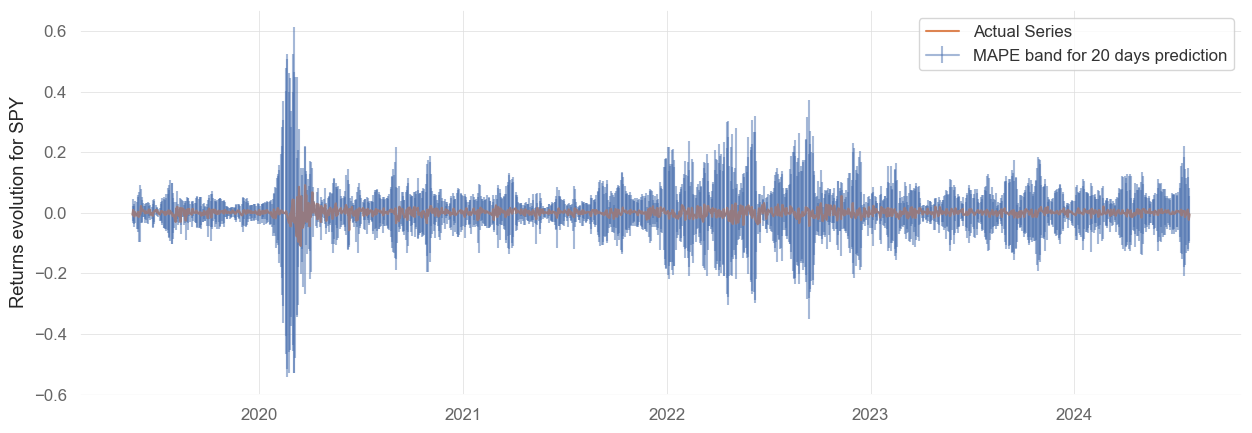

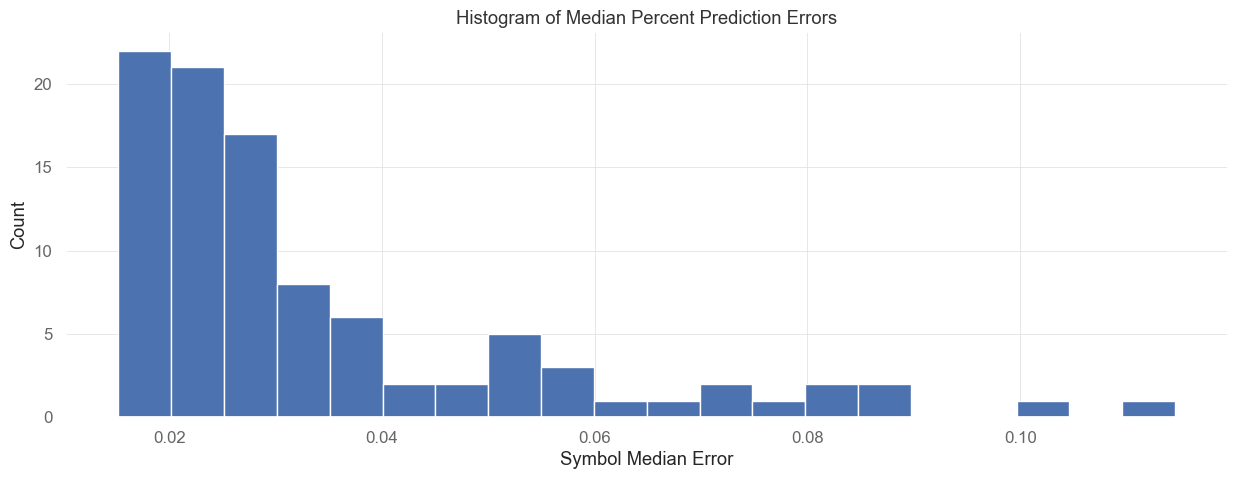

count    97.000000
mean      0.034844
std       0.020561
min       0.015228
25%       0.021004
50%       0.026096
75%       0.038013
max       0.114557
Name: 50%, dtype: float64
Median of Median Errors    0.026096
Mean of Median Errors      0.034844
Mean of Mean Errors        0.047551
dtype: float64


In [14]:
# LightGBM best median of medians
lgbm_model = UnivariateLightGBMs(
    windows=[5, 20, 60, 180, 400],
    lgbm_hpts={"max_depth": 3, "learning_rate": 0.01},
)
lgbm_model.fit(df_train)
predictions_lgbm = lgbm_model.predict(
    df_all,
    n_steps_predict=w_size,
    index_start=i_predict_min,
    index_end=i_predict_max + 1,
)
ser_results = summary_analysis(
    df=df_all,
    n_predict=w_size,
    predictions=predictions_lgbm[:-1, :, :],
    actuals=actuals,
    index_start=i_predict_min,
    index_end=i_predict_max,
    symbol="SPY",
)

2025-01-06 20:52:51,158 - stock_logger - INFO - This model simply uses the last observed value so it is not fitted.


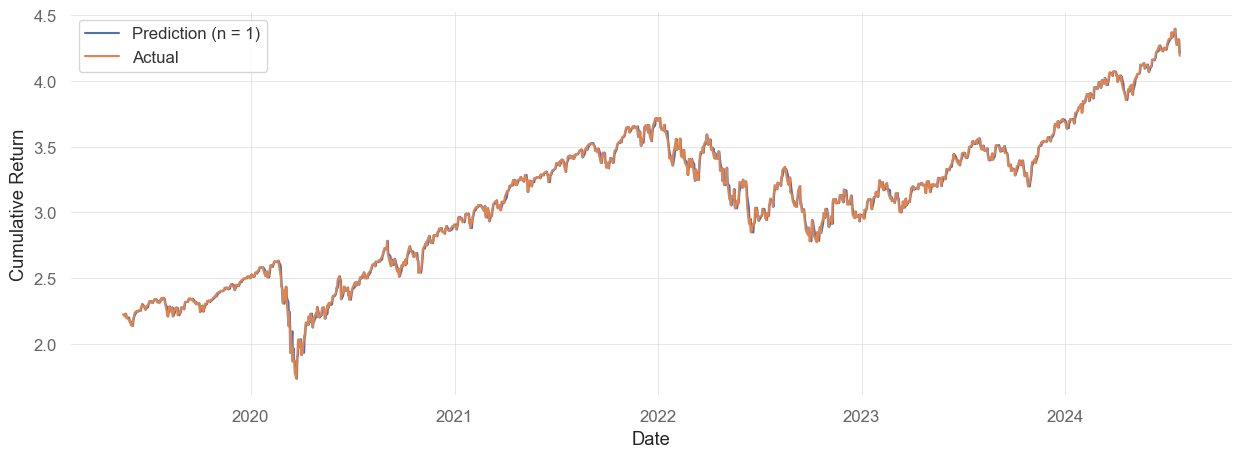

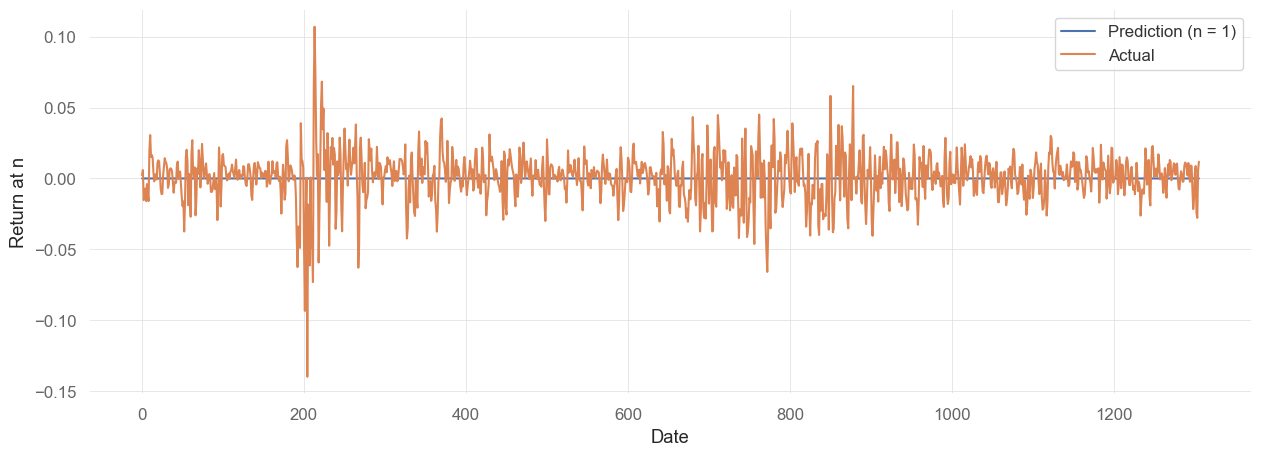

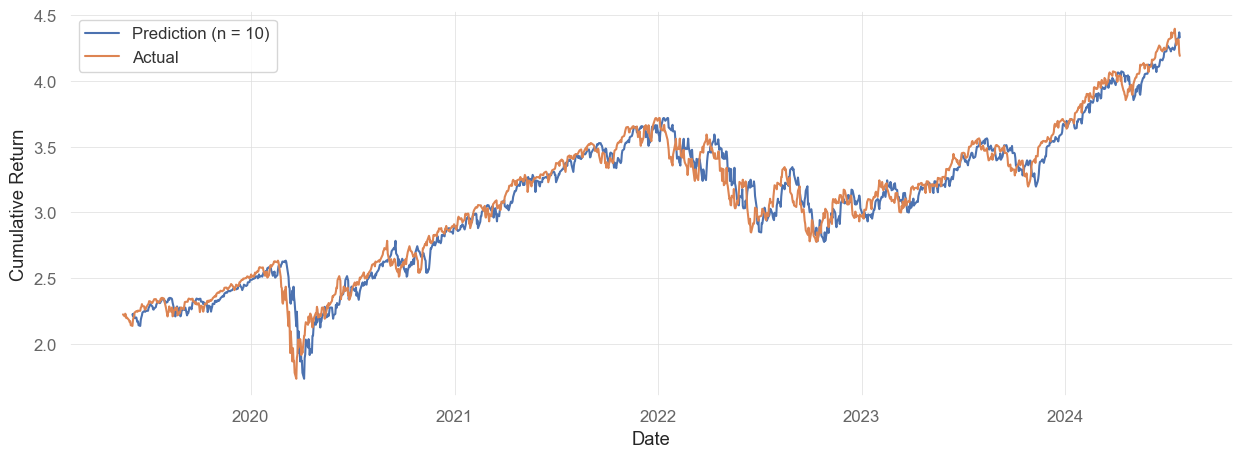

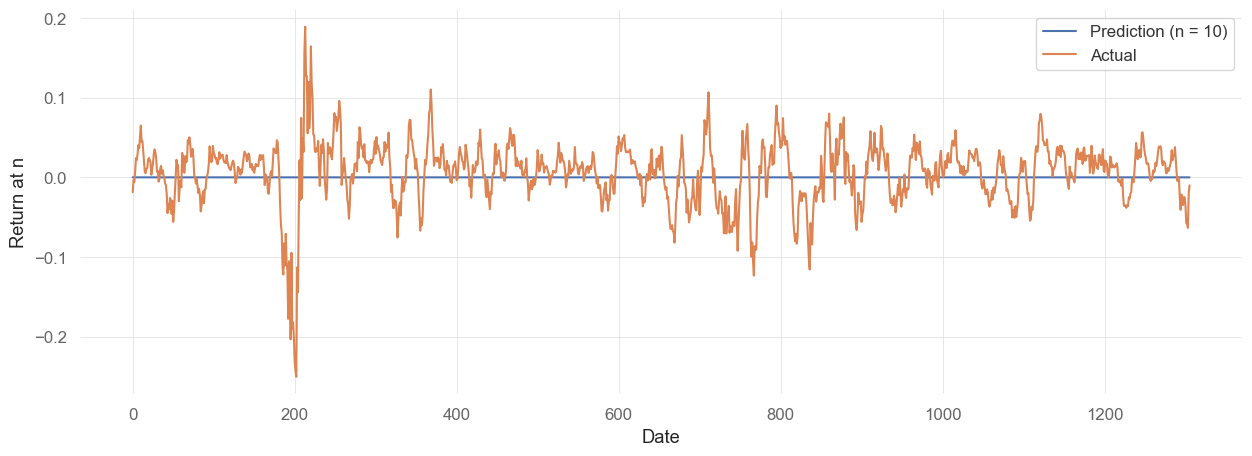

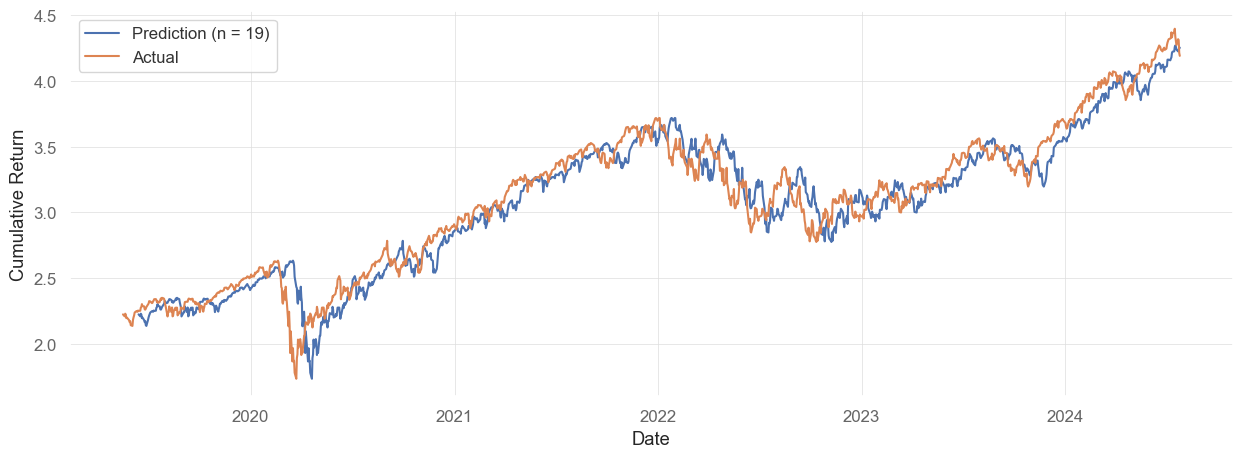

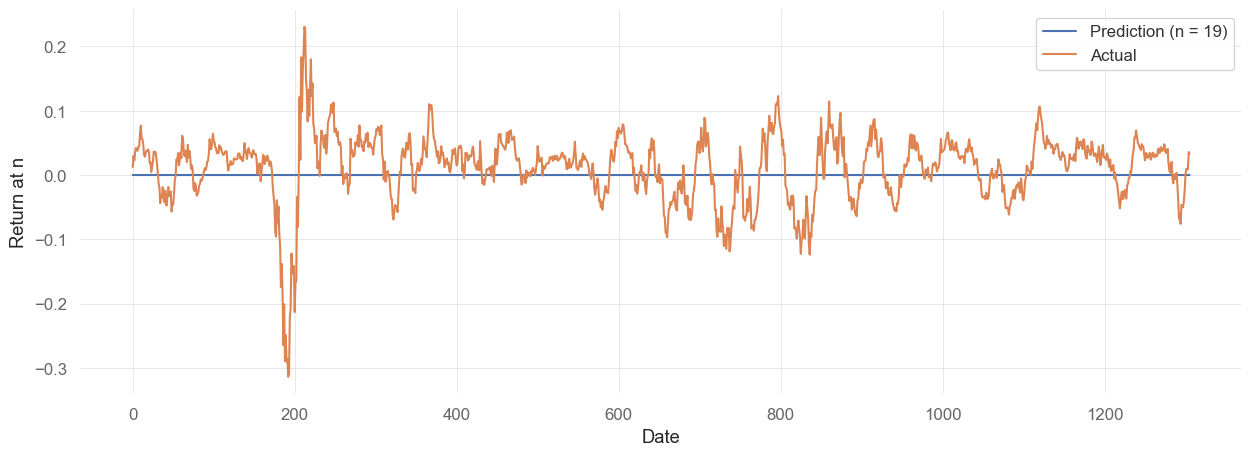

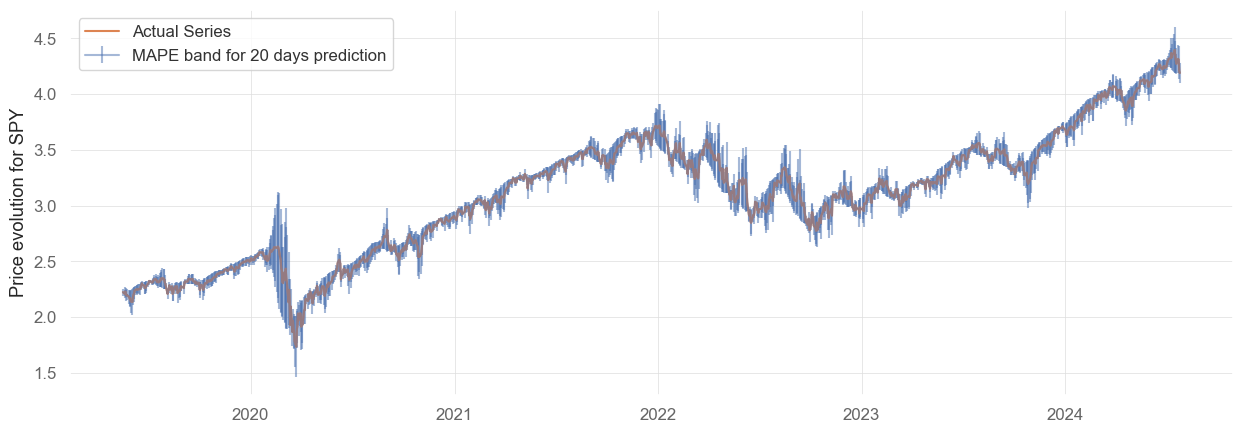

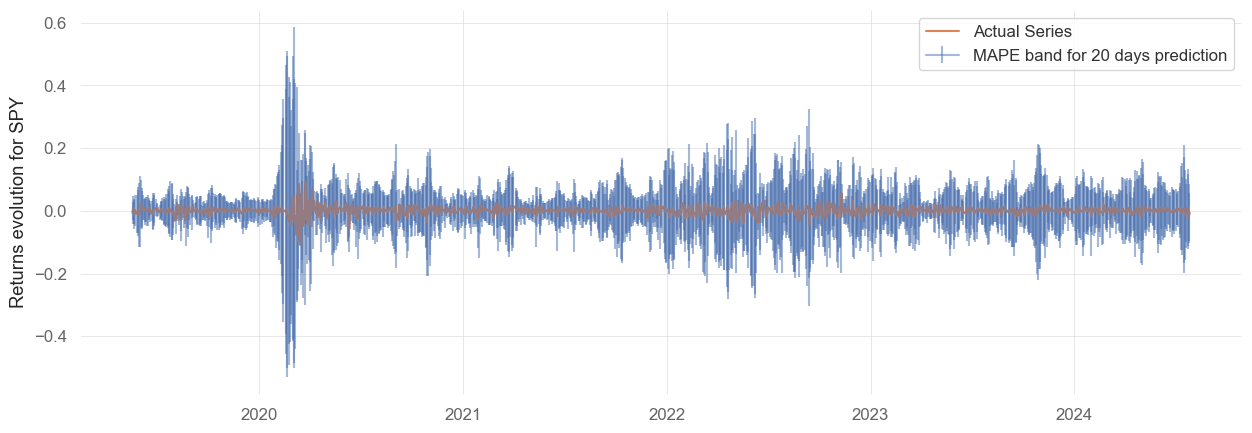

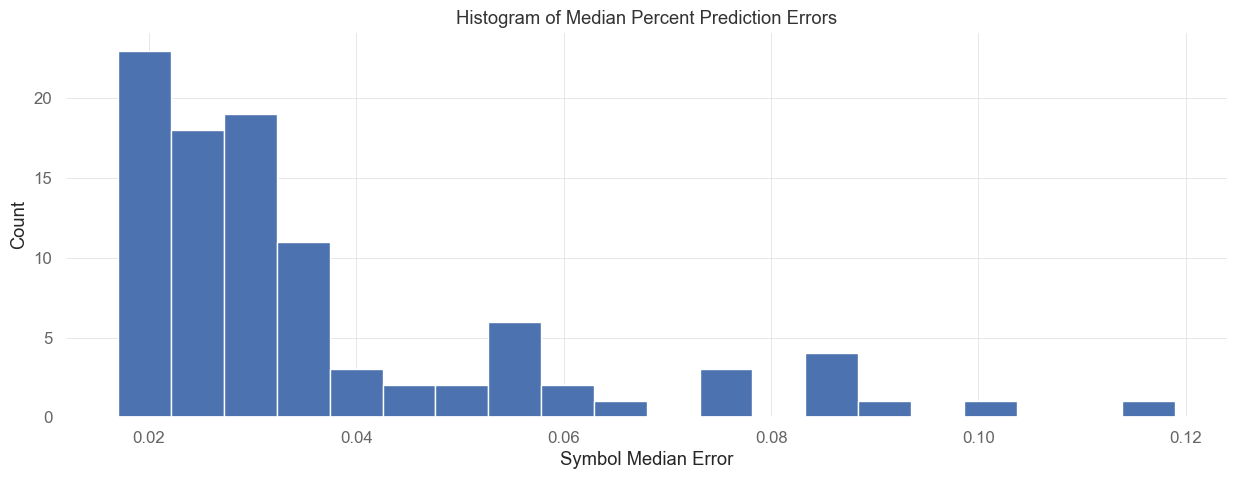

count    97.000000
mean      0.036700
std       0.020839
min       0.017048
25%       0.022323
50%       0.027932
75%       0.041585
max       0.118966
Name: 50%, dtype: float64
Median of Median Errors    0.027932
Mean of Median Errors      0.036700
Mean of Mean Errors        0.047598
dtype: float64


In [15]:
# Baseline - no return
last_value_model = NoReturnForecast(window=w_size)
last_value_model.fit(df_train)
predictions_last_value = last_value_model.predict(
    df_all, n_steps_predict=w_size, index_start=i_predict_min, index_end=i_predict_max
)
_ = summary_analysis(
    df=df_all,
    n_predict=w_size,
    predictions=predictions_last_value,
    actuals=actuals,
    index_start=i_predict_min,
    index_end=i_predict_max,
    symbol="SPY",
)

/home/mops2/.cache/pypoetry/virtualenvs/stock-prediction-c80Ia0bK-py3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mops2/.cache/pypoetry/virtualenvs/stock-prediction-c80Ia0bK-py3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mops2/.cache/pypoetry/virtualenvs/stock-prediction-c80Ia0bK-py3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


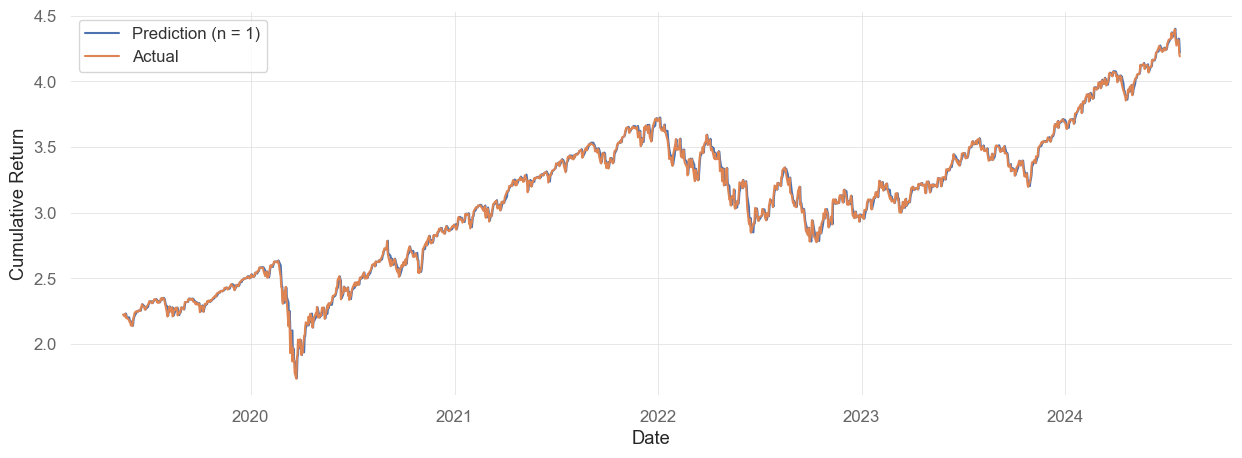

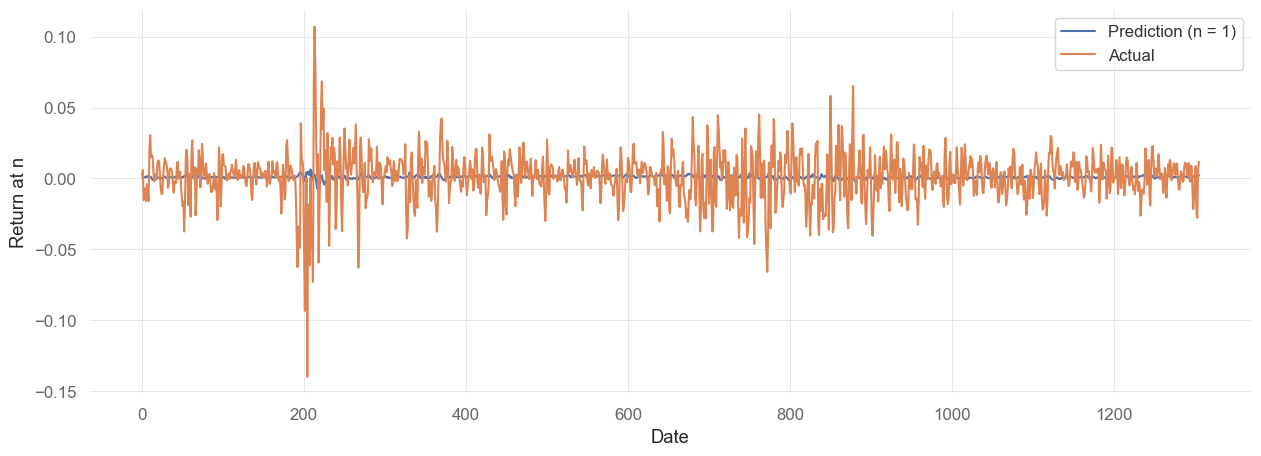

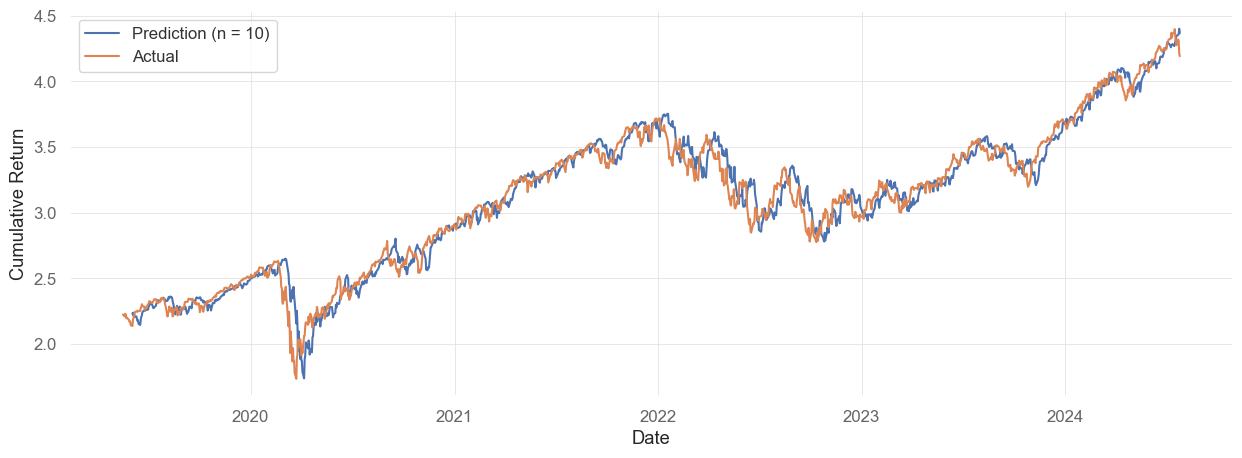

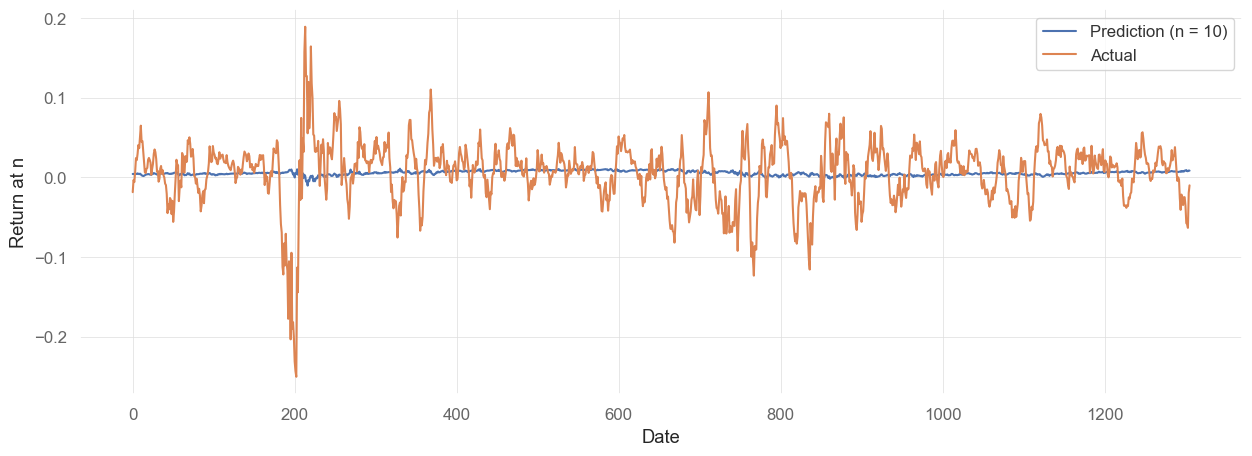

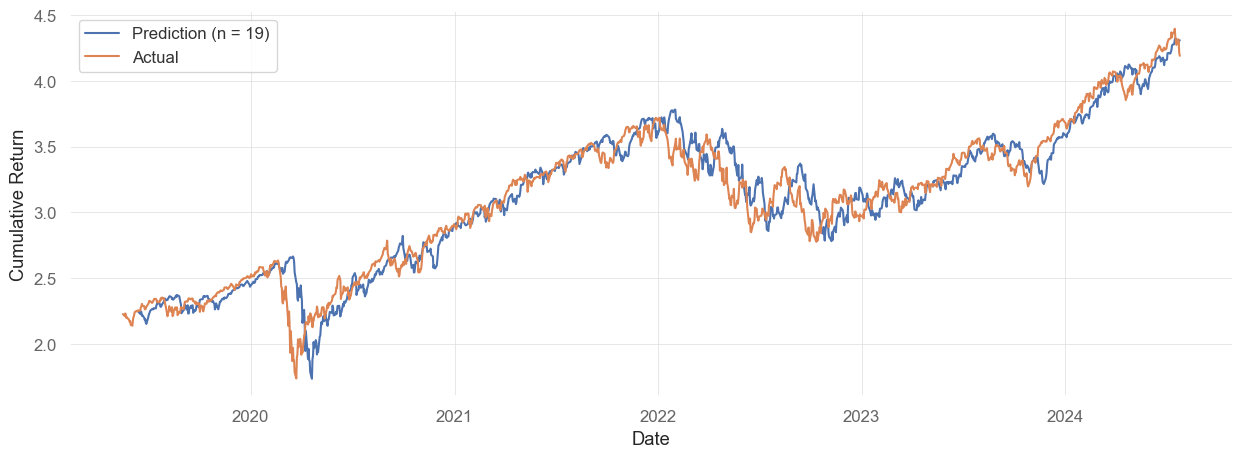

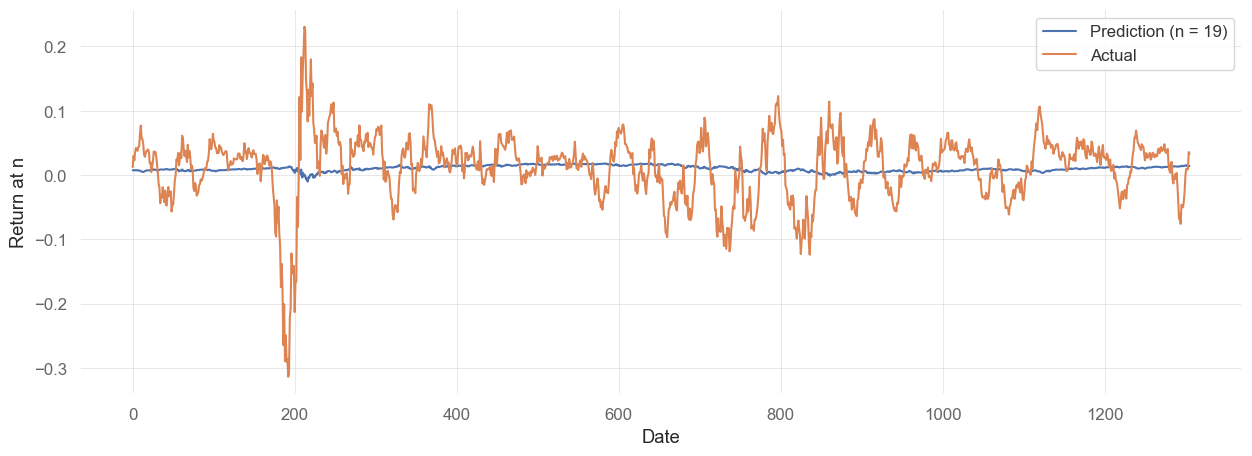

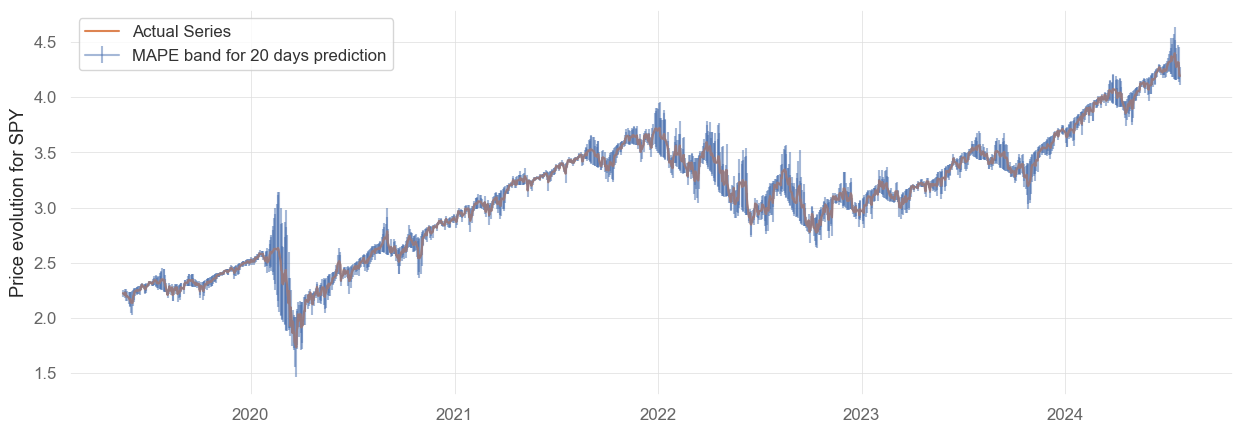

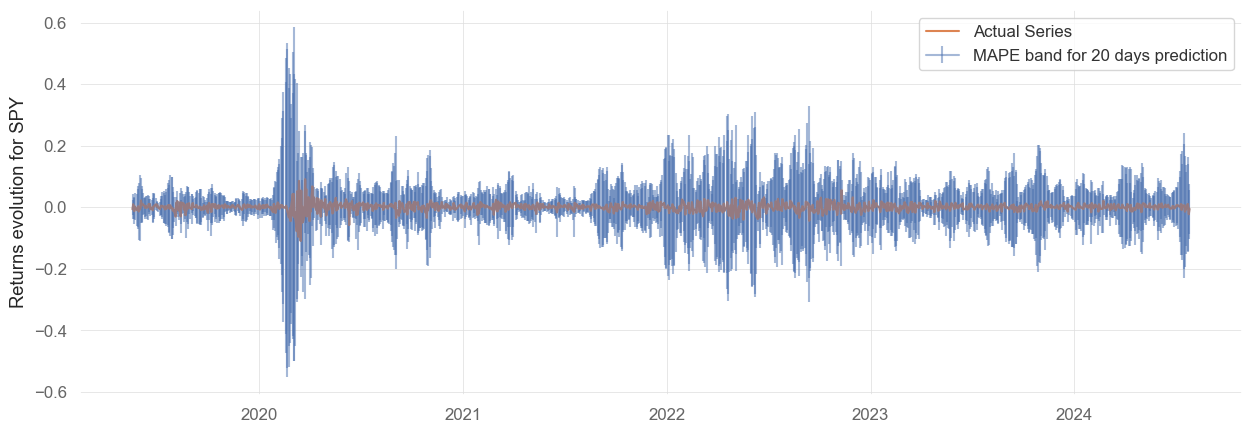

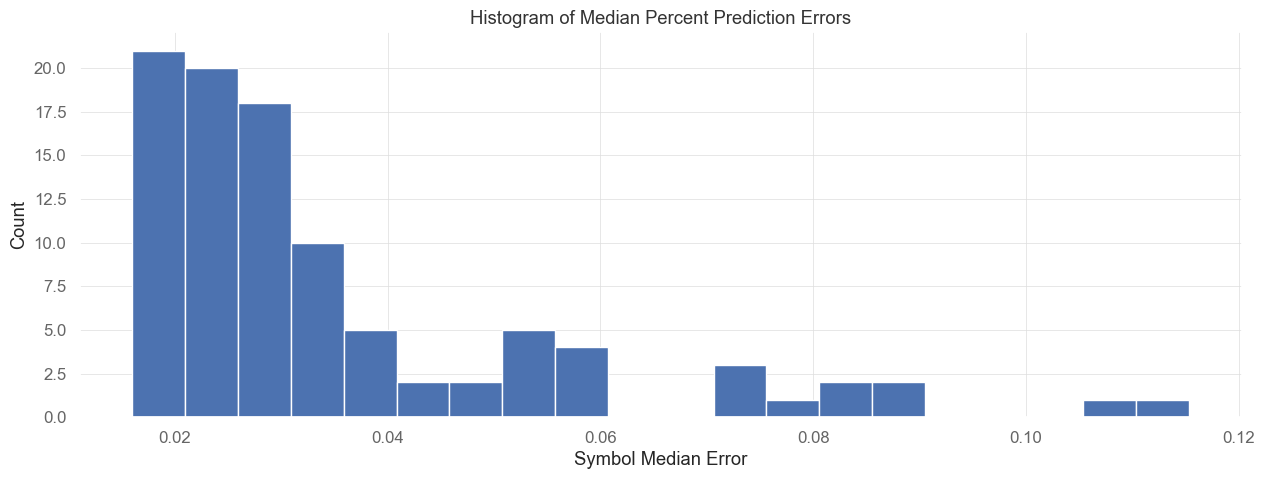

count    97.000000
mean      0.035607
std       0.020447
min       0.015983
25%       0.021892
50%       0.027131
75%       0.039515
max       0.115355
Name: 50%, dtype: float64
Median of Median Errors    0.027131
Mean of Median Errors      0.035607
Mean of Mean Errors        0.047442
dtype: float64


In [18]:
arima_model = UnivariateARIMAs(p=0, d=1, q=5)
arima_model.fit(df_train)
predictions_arima = arima_model.predict(
    df_all,
    index_start=i_predict_min,
    index_end=i_predict_max,
    n_steps_predict=w_size,
)

ser_results = summary_analysis(
    df=df_all,
    n_predict=w_size,
    predictions=predictions_arima,
    actuals=actuals,
    index_start=i_predict_min,
    index_end=i_predict_max,
    symbol="SPY",
)